# Experiment 4.1.2: Mesh Ratio Upper Bound Analysis

This notebook analyzes the mesh ratio upper bounds for Korobov and explicit rank-1 lattices.

The mesh ratio upper bound is given by:
$$\rho(\Lambda) \leq \frac{d\sqrt{d}}{\lambda_1(\Lambda) \cdot \lambda_1(\Lambda^\perp)}$$

We compute this bound for:
- Korobov lattices with optimal generators (from Table korobov_optimal_a)
- Explicit rank-1 lattices with p=2

We analyze the behavior across different dimensions and generate LaTeX commentary.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lattice_qmc import KorobovLattice, ExplicitRank1Lattice
from lattice_qmc.utils import compute_mesh_ratio_upper_bound
import warnings
warnings.filterwarnings('ignore')

# Publication-quality plot settings
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 10,
    'figure.figsize': (10, 7),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'lines.linewidth': 2,
    'lines.markersize': 6,
})

print("Loaded successfully.")

Loaded successfully.


## Load Optimal Korobov Parameters

In [2]:
# Load optimal parameters from previous experiment
try:
    korobov_params = np.load('data/korobov_optimal_parameters.npy', allow_pickle=True).item()
    primes = korobov_params['primes']
    dimensions = korobov_params['dimensions']
    optimal_generators = korobov_params['optimal_generators']
    print("Loaded optimal Korobov parameters from file.")
    print(f"Primes: {primes}")
    print(f"Dimensions: {dimensions}")
except FileNotFoundError:
    print("Error: Please run experiments_04_01_01_parameter_sequences.ipynb first to generate optimal parameters.")
    raise

Loaded optimal Korobov parameters from file.
Primes: [   3    7   13   31   61  127  251  509 1021 2039 4093 8191]
Dimensions: [2 3 5 7]


## Compute Mesh Ratio Upper Bounds - Korobov Lattices

In [3]:
# Compute mesh ratio bounds for Korobov lattices using optimal generators
korobov_bounds = {d: [] for d in dimensions}
korobov_lambda1_primal = {d: [] for d in dimensions}
korobov_lambda1_dual = {d: [] for d in dimensions}

print("Computing mesh ratio bounds for Korobov lattices...\n")

for i, N in enumerate(primes):
    print(f"N = {N}:")
    for d in dimensions:
        a_star = optimal_generators[d][i]
        print(f"  d={d}, a*={a_star}...", end=" ")
        
        lattice = KorobovLattice(d=d, N=N, generator=a_star, verbose=False)
        
        # Compute upper bound
        bound = d * np.sqrt(d) / (lattice.lambda1_primal * lattice.lambda1_dual)
        
        korobov_bounds[d].append(bound)
        korobov_lambda1_primal[d].append(lattice.lambda1_primal)
        korobov_lambda1_dual[d].append(lattice.lambda1_dual)
        
        print(f"bound = {bound:.4f}, λ₁(Λ) = {lattice.lambda1_primal:.4f}, λ₁(Λ⊥) = {lattice.lambda1_dual:.4f}")

print("\nKorobov bounds computed.")

Computing mesh ratio bounds for Korobov lattices...

N = 3:
  d=2, a*=1... bound = 4.2426, λ₁(Λ) = 0.4714, λ₁(Λ⊥) = 1.4142
  d=3, a*=2... bound = 6.3640, λ₁(Λ) = 0.5774, λ₁(Λ⊥) = 1.4142
  d=5, a*=1... bound = 10.6066, λ₁(Λ) = 0.7454, λ₁(Λ⊥) = 1.4142
  d=7, a*=1... bound = 14.8492, λ₁(Λ) = 0.8819, λ₁(Λ⊥) = 1.4142
N = 7:
  d=2, a*=3... bound = 3.9598, λ₁(Λ) = 0.3194, λ₁(Λ⊥) = 2.2361
  d=3, a*=2... bound = 5.6125, λ₁(Λ) = 0.5345, λ₁(Λ⊥) = 1.7321
  d=5, a*=2... bound = 12.6958, λ₁(Λ) = 0.6227, λ₁(Λ⊥) = 1.4142
  d=7, a*=2... bound = 17.0228, λ₁(Λ) = 0.7693, λ₁(Λ⊥) = 1.4142
N = 13:
  d=2, a*=8... bound = 2.8284, λ₁(Λ) = 0.2774, λ₁(Λ⊥) = 3.6056
  d=3, a*=2... bound = 6.5922, λ₁(Λ) = 0.3525, λ₁(Λ⊥) = 2.2361
  d=5, a*=2... bound = 11.3150, λ₁(Λ) = 0.5705, λ₁(Λ⊥) = 1.7321
  d=7, a*=2... bound = 17.7493, λ₁(Λ) = 0.7378, λ₁(Λ⊥) = 1.4142
N = 31:
  d=2, a*=12... bound = 3.0235, λ₁(Λ) = 0.1737, λ₁(Λ⊥) = 5.3852
  d=3, a*=17... bound = 5.2539, λ₁(Λ) = 0.3128, λ₁(Λ⊥) = 3.1623
  d=5, a*=2... bound = 8.80

## Compute Mesh Ratio Upper Bounds - Explicit Rank-1 Lattices

In [19]:
# Compute mesh ratio bounds for Explicit Rank-1 lattices with p=2
p = 2
# Set m values for each dimension
d_m_dict = {2: 10, 3: 16, 5: 12, 7: 9}

explicit_bounds = {d: [] for d in dimensions}
explicit_Q_values = {d: [] for d in dimensions}
explicit_lambda1_primal = {d: [] for d in dimensions}
explicit_lambda1_dual = {d: [] for d in dimensions}

print("Computing mesh ratio bounds for Explicit Rank-1 lattices (p=2)...\n")

for d in dimensions:
    m = d_m_dict[int(d)]
    print(f"\nd={d} (m={m}):")
    alpha = np.array([p**(j/(d+1)) for j in range(1, d+1)])
    lattice = ExplicitRank1Lattice(d=d, m=m, alpha=alpha, verbose=False)
    Q_list = lattice.Q_list
    for i, Q in enumerate(Q_list):
        if Q < 3:
            continue
        print(f"  Q = {Q}...", end=" ")
        lat = ExplicitRank1Lattice(d=d, m=i, alpha=alpha, verbose=False)
        bound = d * np.sqrt(d) / (lat.lambda1_primal * lat.lambda1_dual)
        explicit_bounds[d].append(bound)
        explicit_Q_values[d].append(Q)
        explicit_lambda1_primal[d].append(lat.lambda1_primal)
        explicit_lambda1_dual[d].append(lat.lambda1_dual)
        print(f"bound = {bound:.4f}, λ₁(Λ) = {lat.lambda1_primal:.4f}, λ₁(Λ⊥) = {lat.lambda1_dual:.4f}")

print("\nExplicit Rank-1 bounds computed.")

Computing mesh ratio bounds for Explicit Rank-1 lattices (p=2)...


d=2 (m=10):
  Q = 3... bound = 4.2426, λ₁(Λ) = 0.4714, λ₁(Λ⊥) = 1.4142
  Q = 7... bound = 3.9598, λ₁(Λ) = 0.3194, λ₁(Λ⊥) = 2.2361
  Q = 12... bound = 3.3941, λ₁(Λ) = 0.2635, λ₁(Λ⊥) = 3.1623
  Q = 46... bound = 3.2527, λ₁(Λ) = 0.1375, λ₁(Λ⊥) = 6.3246
  Q = 177... bound = 5.6251, λ₁(Λ) = 0.0533, λ₁(Λ⊥) = 9.4340
  Q = 681... bound = 3.2926, λ₁(Λ) = 0.0355, λ₁(Λ⊥) = 24.1868
  Q = 858... bound = 4.1484, λ₁(Λ) = 0.0282, λ₁(Λ⊥) = 24.1868
  Q = 2620... bound = 4.1914, λ₁(Λ) = 0.0160, λ₁(Λ⊥) = 42.0476
  Q = 5921... bound = 4.2700, λ₁(Λ) = 0.0106, λ₁(Λ⊥) = 62.6259
  Q = 10080... bound = 2.8508, λ₁(Λ) = 0.0099, λ₁(Λ⊥) = 100.0050

d=3 (m=16):
  Q = 4... bound = 6.0000, λ₁(Λ) = 0.6124, λ₁(Λ⊥) = 1.4142
  Q = 7... bound = 5.6125, λ₁(Λ) = 0.5345, λ₁(Λ⊥) = 1.7321
  Q = 9... bound = 7.2161, λ₁(Λ) = 0.4157, λ₁(Λ⊥) = 1.7321
  Q = 10... bound = 5.0709, λ₁(Λ) = 0.4583, λ₁(Λ⊥) = 2.2361
  Q = 22... bound = 8.5206, λ₁(Λ) = 0.2727, λ₁(Λ⊥) = 2.2

## Plot: Mesh Ratio Upper Bound vs Number of Points

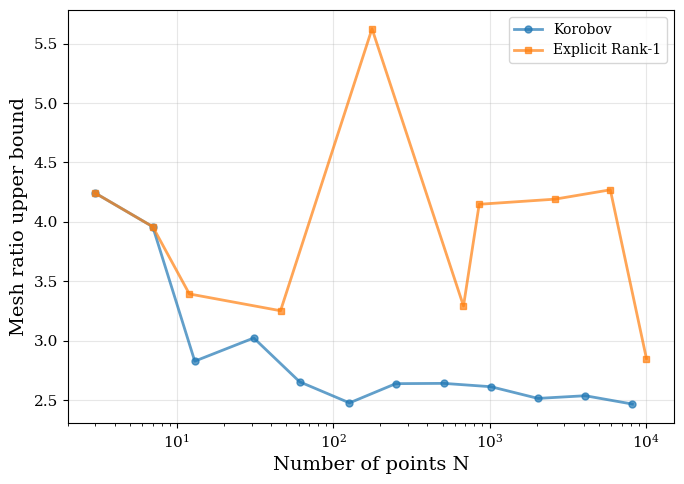

Figure saved as 'mesh_ratio_bounds_vs_N_d2.pdf' and 'mesh_ratio_bounds_vs_N_d2.png'


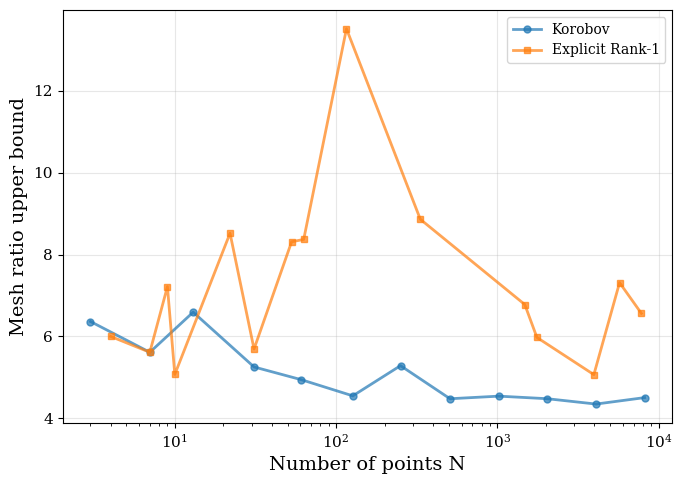

Figure saved as 'mesh_ratio_bounds_vs_N_d3.pdf' and 'mesh_ratio_bounds_vs_N_d3.png'


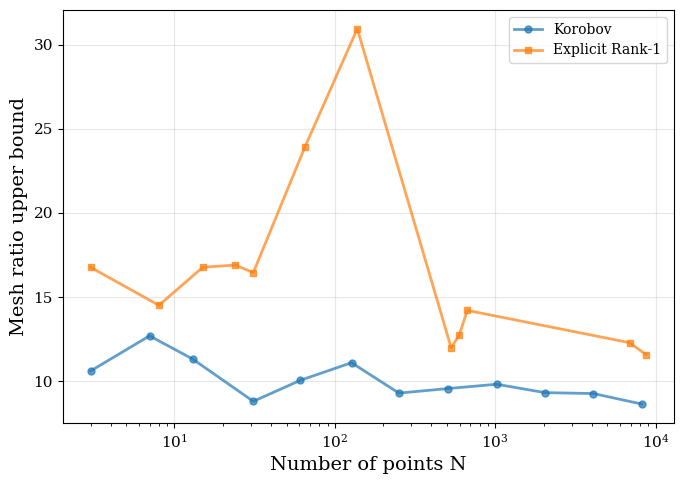

Figure saved as 'mesh_ratio_bounds_vs_N_d5.pdf' and 'mesh_ratio_bounds_vs_N_d5.png'


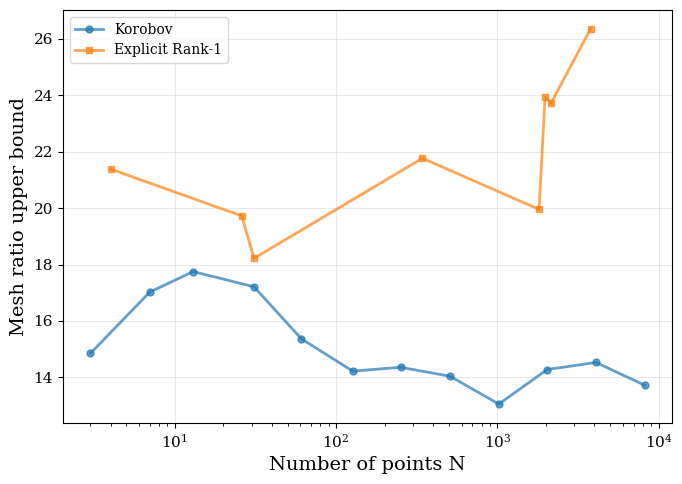

Figure saved as 'mesh_ratio_bounds_vs_N_d7.pdf' and 'mesh_ratio_bounds_vs_N_d7.png'


In [20]:
# Plot each mesh ratio upper bound graph separately
for d in dimensions:
    plt.figure(figsize=(7, 5))
    plt.plot(primes, korobov_bounds[d], 'o-', label='Korobov', markersize=5, alpha=0.7)
    plt.plot(explicit_Q_values[d], explicit_bounds[d], 's-', label='Explicit Rank-1', markersize=5, alpha=0.7)
    plt.xlabel('Number of points N')
    plt.ylabel('Mesh ratio upper bound')
    # plt.title(f'Mesh Ratio Upper Bound (d={d})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.tight_layout()
    plt.savefig(f'mesh_ratio_bounds_vs_N_d{d}.pdf')
    plt.savefig(f'mesh_ratio_bounds_vs_N_d{d}.png')
    plt.show()
    print(f"Figure saved as 'mesh_ratio_bounds_vs_N_d{d}.pdf' and 'mesh_ratio_bounds_vs_N_d{d}.png'")